# GFER Plamitate 12h April 2019
_Maydan Wienreb_
<img src="https://raw.githubusercontent.com/maydanw/InEasyReach/master/hr-brian-litzinger-one.png" alt="Drawing" style="width: 100%; height: 60px" />

In [ ]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

# Imports

In [ ]:
"""
This will enable completion on elements of lists, results of function calls, etc.
However, be warned that enabling this option can be unsafe, because the code is actually evaluated upon hitting TAB
"""
%config IPCompleter.greedy=True

from typing import Dict, Tuple, List

# import numpy
import numpy as np
np.random.seed(0) # Remmeber to reset the seed every time if you expect the second draw to be the same as the first.

#import pandas
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# import graphics
%matplotlib inline
# %matplotlib notebook
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
import seaborn as sns
sns.set_style("whitegrid")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# %load_ext autoreload
# %autoreload 1
# %aimport TestFunctions
## See: https://ipython.org/ipython-doc/3/config/extensions/autoreload.html


In [ ]:
rcParams['figure.figsize'] = [12.0, 8.0]
rcParams['pdf.fonttype'] = 42 ## Output Type 3 (Type3) or Type 42 (TrueType)
rcParams['font.sans-serif'] = 'Arial'
sns.set_style("whitegrid")

In [ ]:
import types
import sys
print ("Basic packages versions:")
print ("   Python version: %s" % (sys.version))
print ("   Packages:")


try:  
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))
except: 
    g=globals().values()
    for i, mod in enumerate(g):
        if isinstance(mod, types.ModuleType):
            if hasattr(mod, '__name__') and hasattr(mod, '__version__'):
                print ("   %s: %s" % (mod.__name__, mod.__version__))

# General

# Loading the data

In [ ]:
data_path = "../Data/Palmitate/12h/Standard lab acquisition protocol 5_pal12htmremito160419gfer1_1/agg_results.csv"

df = pd.read_csv(data_path, index_col=0)
df = df.drop(labels='index', axis=1)
df = df[df.nuc_outlier==False]
df = df[df.cyto_outlier==False]
df = df[df.Cyto_border_case==False]
df = df.drop(labels=['nuc_outlier', 'cyto_outlier', 'Cyto_border_case'], axis=1)
df.sample(5)

In [ ]:
df["Patient"] = np.nan
df.loc[df.column.isin([2, 3]), "Patient"] = "AV"
df.loc[df.column.isin([4, 5]), "Patient"] = "AG015"
df.loc[df.column.isin([6, 7]), "Patient"] = "EV"
df.loc[df.column.isin([8, 9]), "Patient"] = "CM"
df.loc[df.column.isin([10, 11]), "Patient"] = "progeria127"
display('ok'if df["Patient"].isna().any()==False else ':-(')

In [ ]:
patient_plate = df.groupby(['column', 'row']).Patient.first().unstack(level=-1).T
patient_plate

In [ ]:
df["Compound"] = np.nan
df.loc[df.column.isin([2,4,6,8,10]), "Compound"] = "Normal"
df.loc[df.column.isin([3,5,7,9,11]), "Compound"] = "Palmitate"

display('ok'if df["Patient"].isna().any()==False else ':-(')

In [ ]:
compound_plate = df.groupby(['column', 'row']).Compound.first().unstack(level=-1).T
compound_plate

# Number of cells 


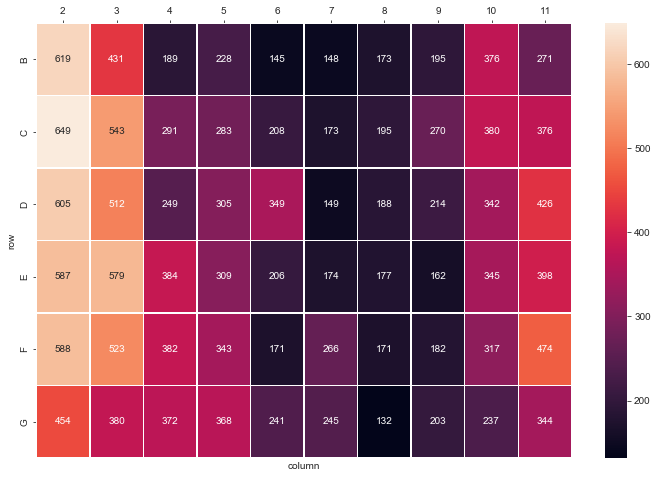

In [18]:
cell_in_well = df.groupby(["row", "column"])["Compound"].count().unstack(level=-1)
ax = sns.heatmap(cell_in_well, linewidths=0.5, annot=True, fmt="0.00f")
ax.xaxis.set_ticks_position('top')

In [19]:
order = ['Normal', 'Palmitate']

In [20]:
g = df.groupby(["row", "column", "Patient", "Compound"])["Cyto_intensity_avg"].count()
g = g.groupby(["Patient", "Compound"]).mean().reset_index()


sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="Cyto_intensity_avg", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cells Count")
ax.legend(loc = 1)
plt.tight_layout()


# Analyzing the features

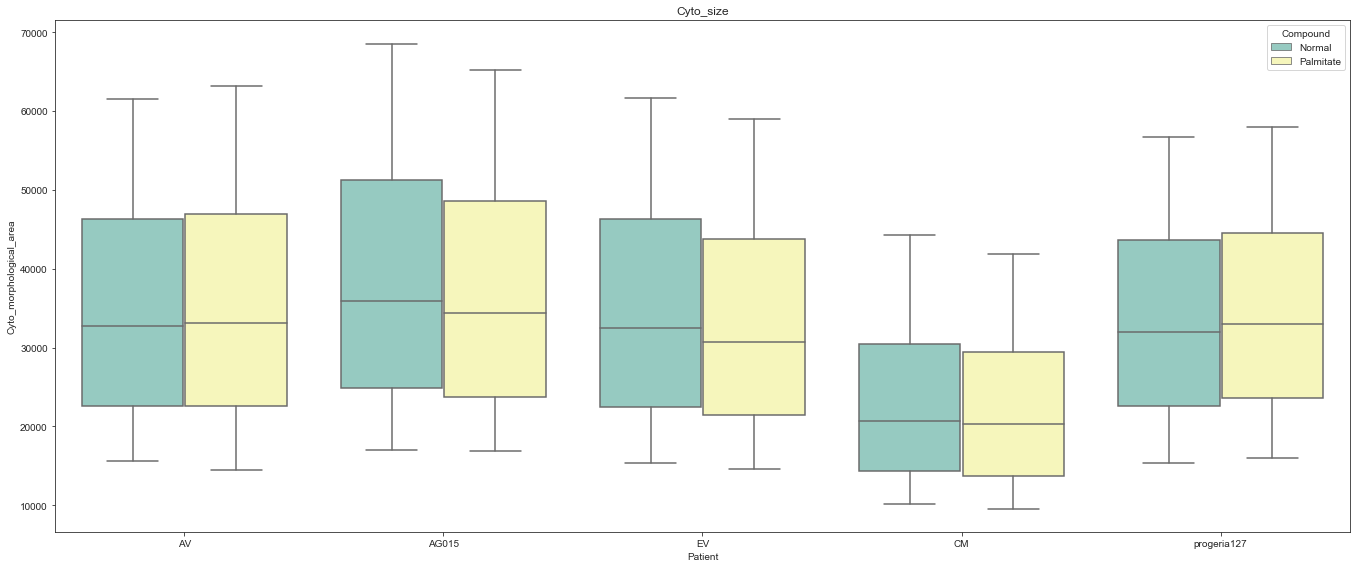

In [21]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("Cyto_size")
plt.tight_layout()

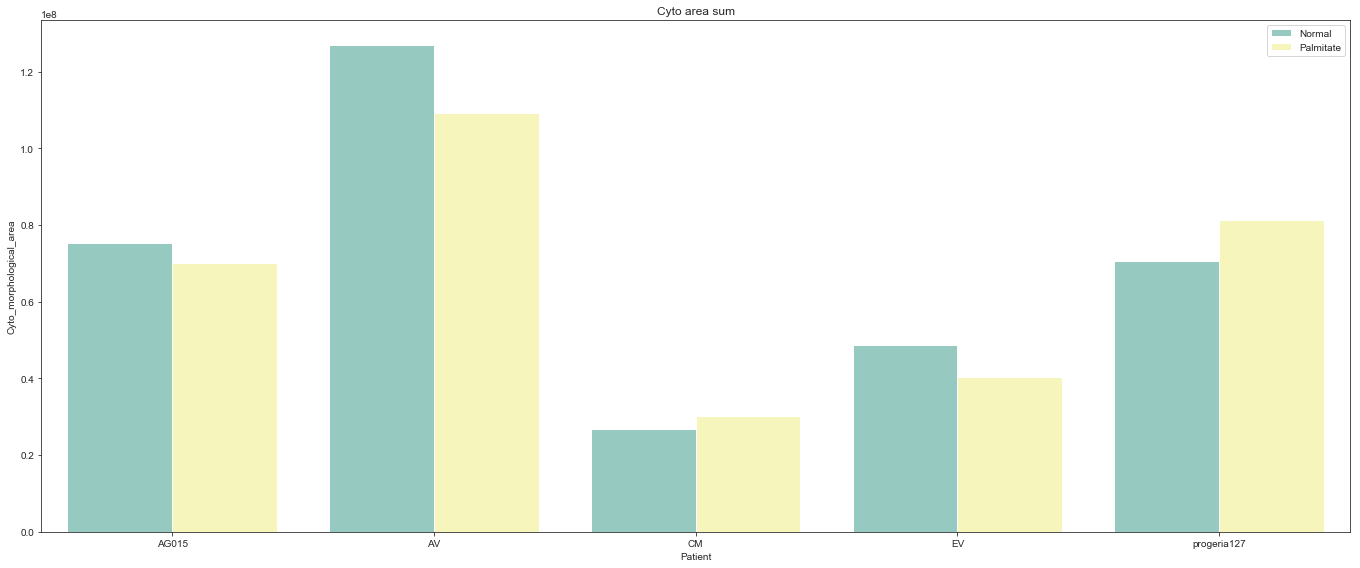

In [22]:
g = df.groupby(['Patient', 'Compound'])["Cyto_morphological_area"].sum().reset_index()

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.barplot(x="Patient", y="Cyto_morphological_area", hue="Compound", data=g, palette="Set3" ,ax=ax, ci=None, hue_order=order);
ax.set_title("Cyto area sum")
ax.legend(loc = 1)
plt.tight_layout()


In [24]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_intensity_avg_mean", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_intensity_avg_mean")
plt.tight_layout()

In [30]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_morphological_area_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_morphological_area_sum")
plt.tight_layout()

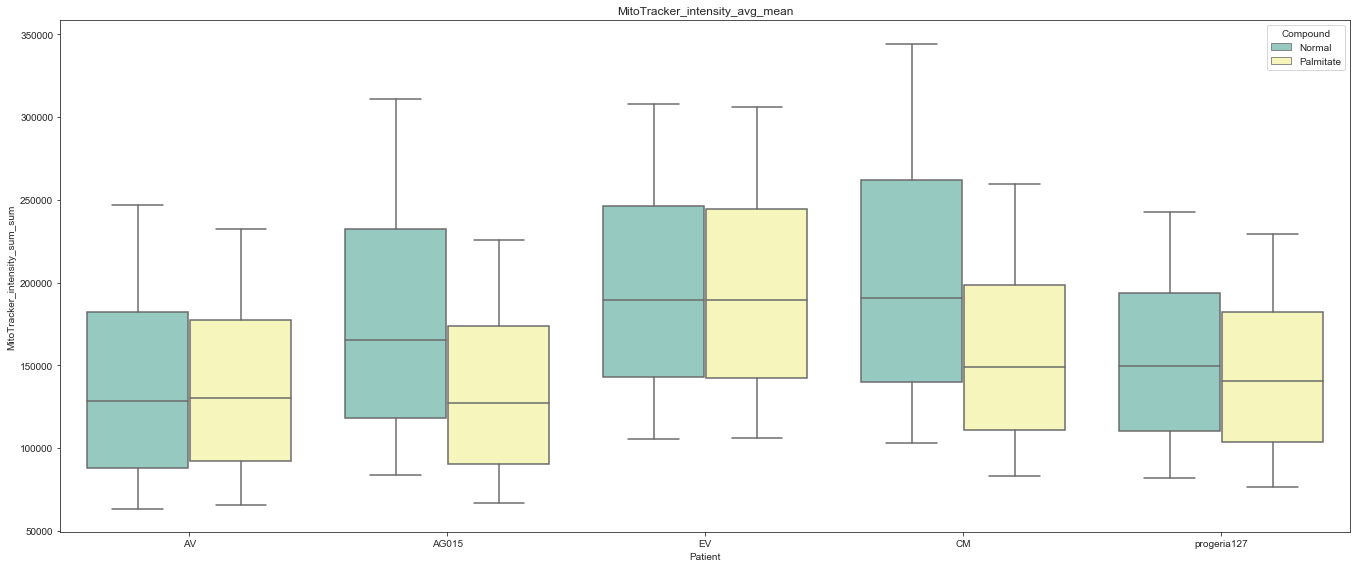

In [26]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoTracker_intensity_sum_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoTracker_intensity_avg_mean")
plt.tight_layout()

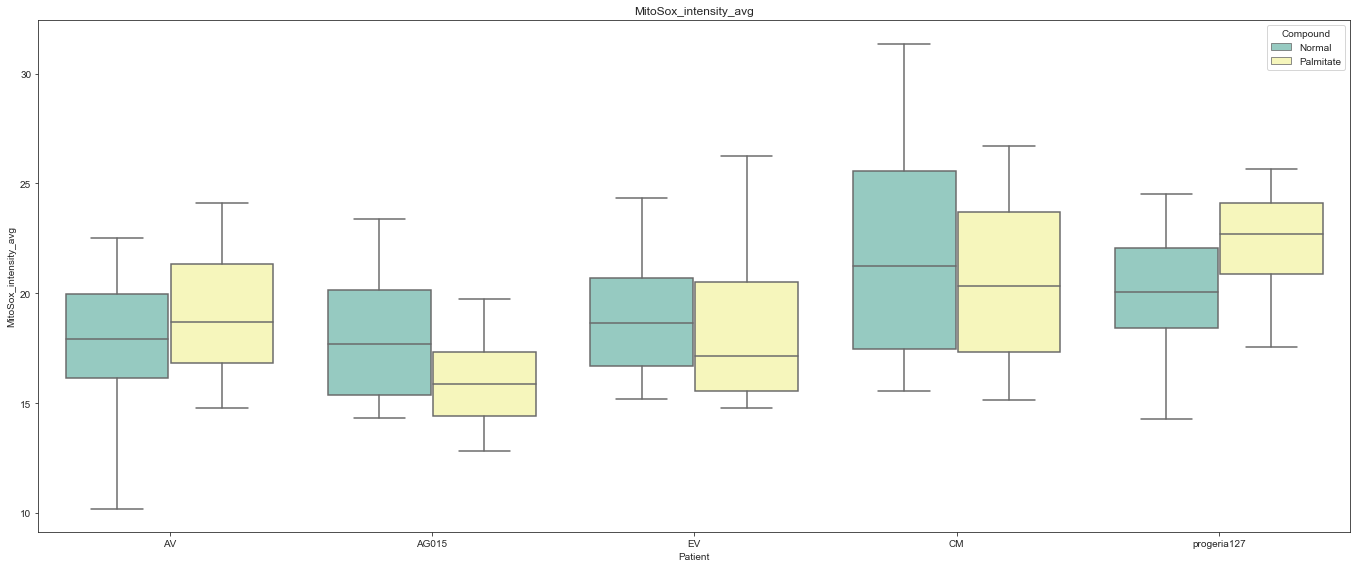

In [29]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoSox_intensity_avg", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoSox_intensity_avg")
plt.tight_layout()

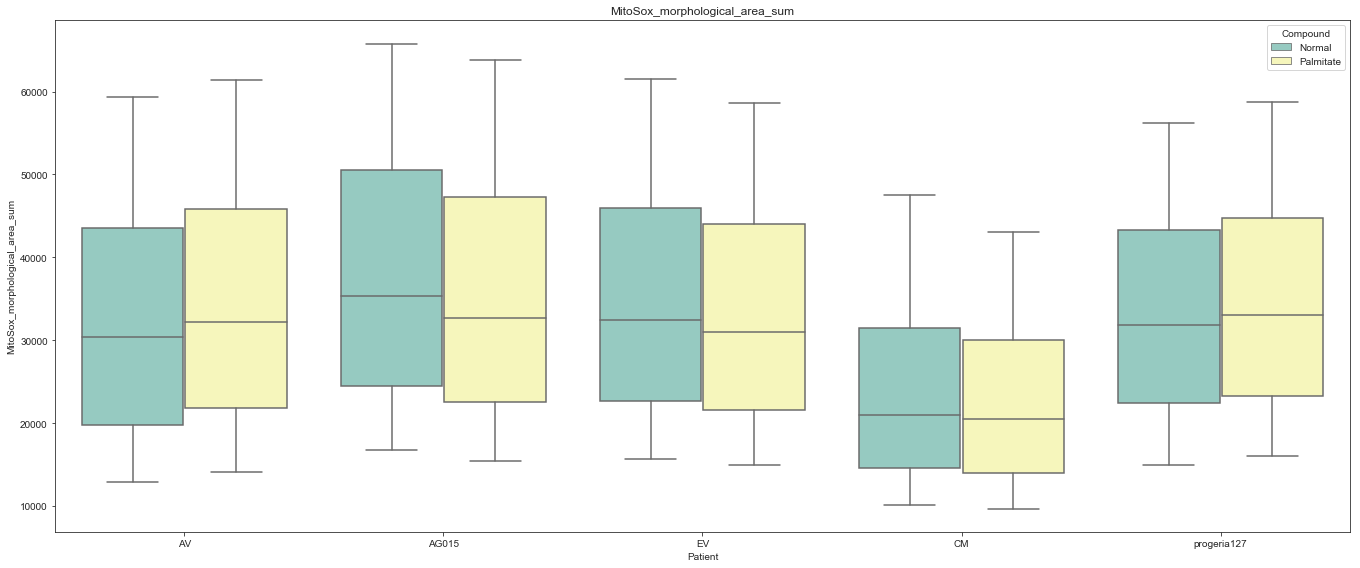

In [34]:
df["MitoSox_morphological_area_sum"] = df['MitoSox_in_MitoTracker_size']+df['MitoSox_outside_MitoTracker_size']

sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoSox_morphological_area_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoSox_morphological_area_sum")
plt.tight_layout()

In [28]:
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y="MitoSox_intensity_sum", hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title("MitoSox_intensity_sum")
plt.tight_layout()

In [48]:
field = 'MitoTracker_count'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

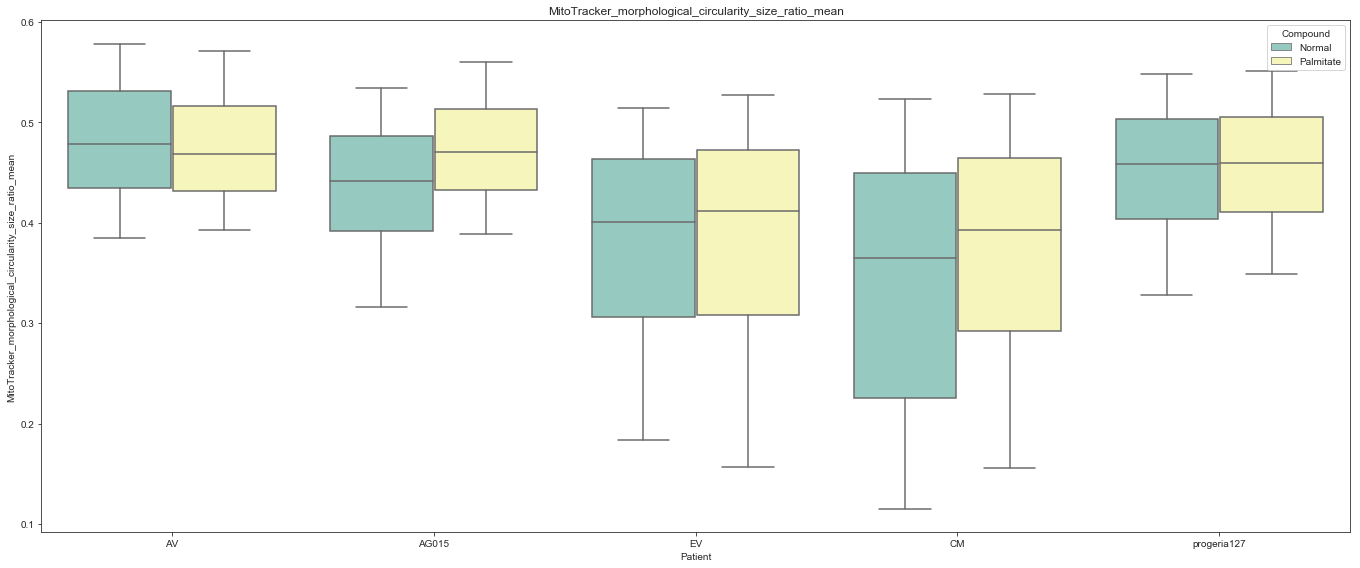

In [47]:
field = 'MitoTracker_morphological_circularity_size_ratio_mean'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

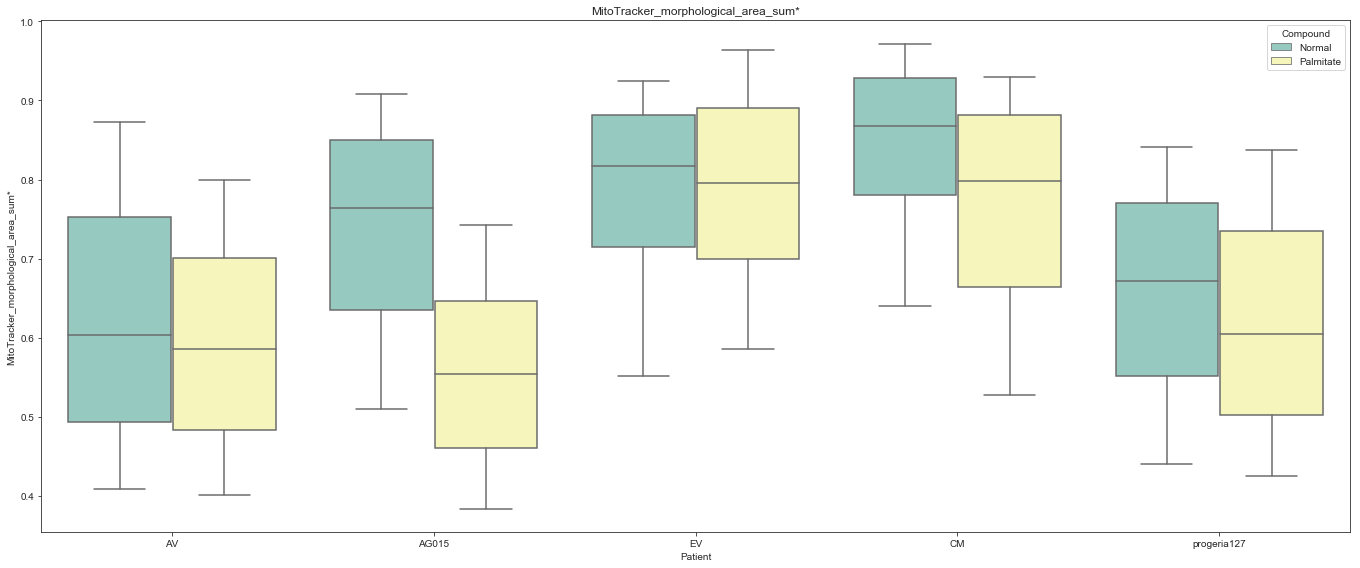

In [52]:
df['MitoTracker_morphological_area_sum*'] = df['MitoTracker_morphological_area_sum']/df['Cyto_morphological_area']
field = 'MitoTracker_morphological_area_sum*'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

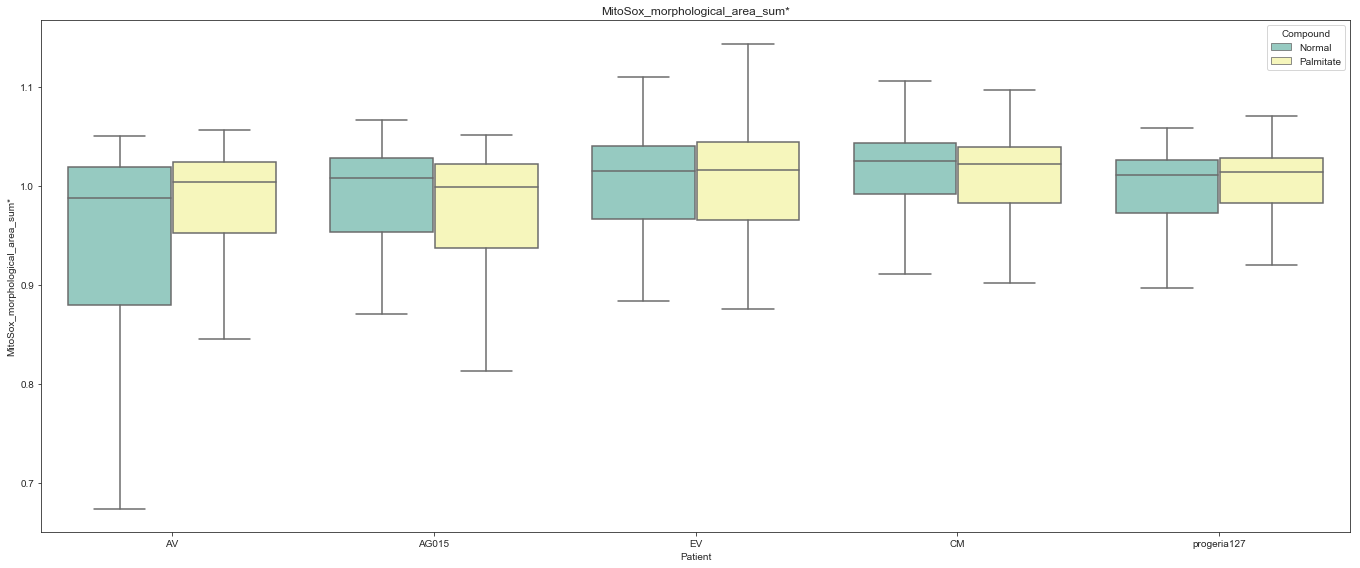

In [54]:
df['MitoSox_morphological_area_sum*'] = df['MitoSox_morphological_area_sum']/df['Cyto_morphological_area']

field = 'MitoSox_morphological_area_sum*'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

## Warning
The above cannot be true

In [53]:
df['MitoSox_morphological_area_sum**'] = df['MitoSox_morphological_area_sum']/df['MitoTracker_morphological_area_sum']

field = 'MitoSox_morphological_area_sum**'
sns.set_style('ticks')
fig, ax = plt.subplots(1,1, sharey=True)
fig.set_size_inches(19, 8)
sns.boxplot(x="Patient", y=field, hue="Compound", data=df, palette="Set3", showfliers=False, whis = [10,90], ax=ax, hue_order=order)
ax.set_title(field)
plt.tight_layout()

In [32]:
# df.columns.tolist()

['Cyto_intensity_avg',
 'Cyto_intensity_count',
 'Cyto_intensity_max',
 'Cyto_intensity_q10',
 'Cyto_intensity_q50',
 'Cyto_intensity_q90',
 'Cyto_intensity_std',
 'Cyto_intensity_sum',
 'Cyto_morphological_area',
 'Cyto_morphological_aspect_ratio',
 'Cyto_morphological_circularity_size_ratio',
 'Cyto_morphological_cx',
 'Cyto_morphological_cy',
 'Cyto_morphological_extent',
 'Cyto_morphological_h',
 'Cyto_morphological_min_enclosing_circle_area',
 'Cyto_morphological_perimeter',
 'Cyto_morphological_rect_area',
 'Cyto_morphological_solidity',
 'Cyto_morphological_w',
 'MitoSox_in_MitoTracker_avg',
 'MitoSox_in_MitoTracker_max',
 'MitoSox_in_MitoTracker_q10',
 'MitoSox_in_MitoTracker_q50',
 'MitoSox_in_MitoTracker_q90',
 'MitoSox_in_MitoTracker_size',
 'MitoSox_in_MitoTracker_std',
 'MitoSox_intensity_avg',
 'MitoSox_intensity_count',
 'MitoSox_intensity_max',
 'MitoSox_intensity_q10',
 'MitoSox_intensity_q50',
 'MitoSox_intensity_q90',
 'MitoSox_intensity_std',
 'MitoSox_intensity_sum